## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [125]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

King County House Sales dataset.<br>

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [229]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')

In [230]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [231]:
df.shape

(21597, 21)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [233]:
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


#### Null Values
Columns: waterfront, view and yr_renovated has NaN values.<br>

In [245]:
df.columns
df_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [246]:
df_housing = df[df_cols]

In [247]:
df_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [248]:
df_housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [249]:
#do any rows have duplicate data.
duplicates = df_housing[df_housing.duplicated()]
print(len(duplicates))

0


In [250]:
#missing values
# waterfront 2376   11%
#view        63     0.2%
# yr_renovated 3842 17.789%
df_housing.isnull().sum() * 100/ len(df_housing)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [251]:
#waterfront - House which has a view to a waterfront
print(df_housing['waterfront'].value_counts(dropna=False) )
print('---------')
print(df_housing['waterfront'].value_counts(dropna=False) * 100 / len(df_housing['waterfront']))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64
---------
0.0    88.322452
NaN    11.001528
1.0     0.676020
Name: waterfront, dtype: float64


In [252]:
df_housing['waterfront'].unique()

array([nan,  0.,  1.])

In [240]:
#kc_df = df.copy()

In [257]:
df_housing['waterfront'].isnull().sum()

2376

In [260]:
try:
    fill_col = ['waterfront']
    df_housing['waterfront'].fillna(value=df_housing['waterfront'].mode()[0], inplace=True)
except:
    print("'waterfront' not in the dataframe.")        

In [261]:
df_housing['waterfront'].isnull().sum()

0

In [262]:
# 21,597
df_housing['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [263]:
#years renovated
#yr_renovated 
#it looks like the majority of homes weren't renovated or 78% of variable
print(df_housing['yr_renovated'].value_counts(dropna=False))
print('---------------')
print(df_housing['yr_renovated'].value_counts(dropna=False) *100 / len(kc_df['yr_renovated']))

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64
---------------
0.0       78.765569
NaN       17.789508
2014.0     0.338010
2003.0     0.143538
2013.0     0.143538
            ...    
1944.0     0.004630
1948.0     0.004630
1976.0     0.004630
1934.0     0.004630
1953.0     0.004630
Name: yr_renovated, Length: 71, dtype: float64


In [264]:
df_housing['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [265]:
try:
    df_housing['yr_renovated'].fillna(value= df_housing['yr_renovated'].mode()[0], inplace=True)
except:
    print('not in the dataframe.')   

In [266]:
df_housing['yr_renovated'].value_counts() 

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [267]:
df_housing['yr_renovated'].isnull().sum()

0

The column 'view' has NaNs, but they only make up 1% (0.291707) of independent variable so I'm going to drop it.

In [268]:
try:
    df_housing = df_housing.dropna(subset=['view'])
except:
    print('not in the dataframe.')  

In [269]:
df_housing['view'].isnull().sum()

0

In [270]:
df_housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Convert Object Datatypes
The columns date and sqft_basement are considered objects and need to be numeric datatypes.<br>

In [271]:
numeric_data = df_housing.select_dtypes(include=[np.number])
cat_data = df_housing.select_dtypes(exclude=[np.number])
print ("There are {} numeric columns and {} categorical columns in the housing data set".format(numeric_data.shape[1],cat_data.shape[1]))

There are 19 numeric columns and 2 categorical columns in the housing data set


In [272]:
df_housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [273]:
df_housing.loc[:, df_housing.dtypes == object]

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


In [274]:
#sqft_basement - square footage of the basement
df_housing['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
1816.0        1
3500.0        1
2120.0        1
506.0         1
784.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [275]:
df_housing['sqft_basement'].value_counts() *100 / len(kc_df['sqft_basement'])

0.0       59.258230
?          2.092883
600.0      1.000139
500.0      0.967727
700.0      0.958466
            ...    
1816.0     0.004630
3500.0     0.004630
2120.0     0.004630
506.0      0.004630
784.0      0.004630
Name: sqft_basement, Length: 302, dtype: float64

In [276]:
try:
    df_housing["sqft_basement"] = df_housing["sqft_basement"].replace('?', '0.0')
except:
    print('not in the dataframe.')  

In [277]:
df_housing['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
1281.0        1
1548.0        1
276.0         1
2240.0        1
784.0         1
Name: sqft_basement, Length: 301, dtype: int64

In [278]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [279]:
df_housing['sqft_basement']  = df_housing['sqft_basement'].astype('float64')

In [280]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


#### Convert date
Column date is an object and needs to convery to datetime datatype.<br>

In [281]:
df_housing['date'] = pd.to_datetime(df_housing['date'])

In [282]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

In [283]:
df_housing.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [284]:
#date doesn't show up
df_housing.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,4.582351e+09,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,285.244,1971.002,68.867,98077.939,47.560,-122.214,1986.300,12751.080
std,2.876779e+09,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,439.334,29.376,364.315,53.507,0.139,0.141,685.121,27255.483
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2.123212e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3.904945e+09,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7.312175e+09,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Independent variables that are categorical

In [285]:
df_housing['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [286]:
df_housing['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [287]:
df_housing['floors'].value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [288]:
df_housing['waterfront'].value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [289]:
#view-has been viewed
df_housing['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [290]:
#condition - How good the condition is (Overall)
df_housing['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [294]:
#yr_renovated - Year when house was renovated
#96% of homes weren't renovated
print(df_housing['yr_renovated'].value_counts())
print('----------------')
print(df_housing['yr_renovated'].value_counts() *100/ len(df_housing['yr_renovated']))

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64
----------------
0.0       96.549642
2014.0     0.338999
2003.0     0.143958
2013.0     0.143958
2007.0     0.139315
            ...    
1946.0     0.004644
1959.0     0.004644
1971.0     0.004644
1951.0     0.004644
1954.0     0.004644
Name: yr_renovated, Length: 70, dtype: float64


In [171]:
kc_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [172]:
#pd.plotting.scatter_matrix(df_housing, figsize=(14,14));

### Target
The target variable is skewed.<br>
There are a lot of outliers.<br>

In [295]:
len(df_housing['price'].unique())

3613

In [296]:
df_housing['price'].describe().round(3)

count      21534.000
mean      540057.664
std       366059.581
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

In [297]:
bins = [77000, 320000,440000,640000,700000]
bins_price = pd.cut(df_housing['price'], bins)
bins_price = bins_price.cat.as_ordered()
bins_price.head()

0     (77000, 320000]
1    (440000, 640000]
2     (77000, 320000]
3    (440000, 640000]
4    (440000, 640000]
Name: price, dtype: category
Categories (4, interval[int64]): [(77000, 320000] < (320000, 440000] < (440000, 640000] < (640000, 700000]]

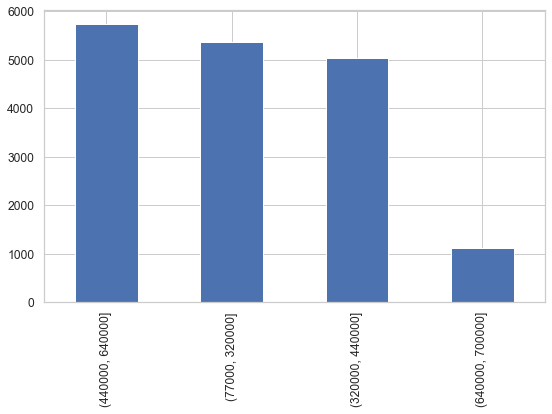

In [298]:
bins_price.value_counts().plot(kind='bar')

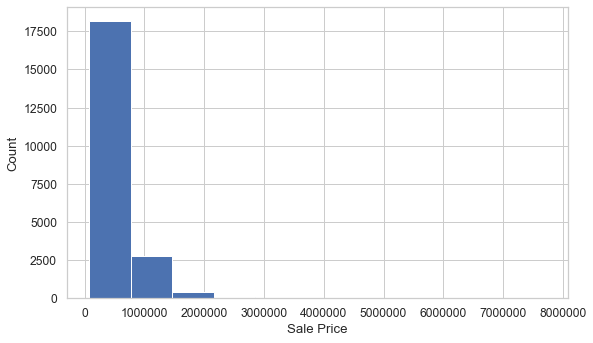

In [302]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_housing['price'], norm_hist=False, kde=False, bins=11, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

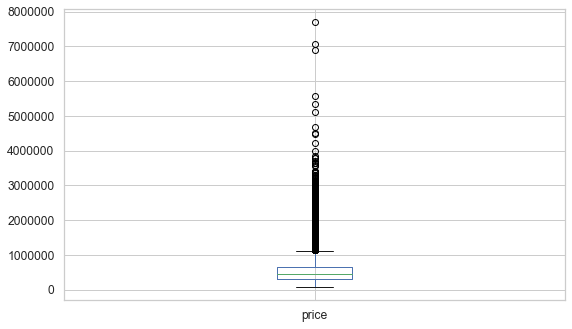

In [303]:
#there appear to be a lot of outliers
df_housing['price'].plot(kind='box');

### Dealing with Categorical Variables<br>
The independent variables that would be considered categorical are numeric so we don't have to worry about converting them to numeric data types.<br>
Probably would be easier to work with if broken up into bins.<br>

In [304]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [305]:
df_housing[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','yr_built',
            'yr_renovated']].nunique()

bedrooms         12
bathrooms        29
floors            6
waterfront        2
view              5
condition         5
grade            11
yr_built        116
yr_renovated     70
dtype: int64

In [306]:
df_housing['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

bathrooms sounds like it generally would be categorcial, i.e., 1, 2 or 3 bathrooms, but there are lots of variations to this column.

In [307]:
df_housing['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

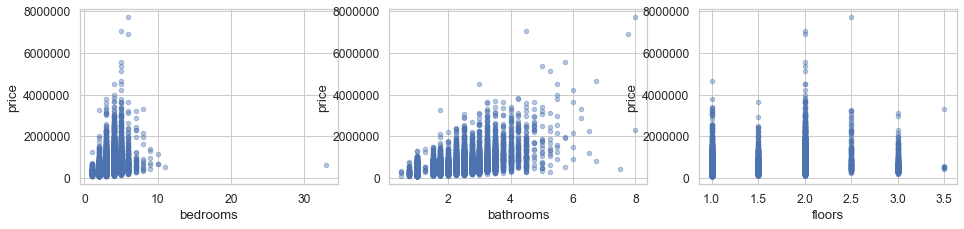

In [308]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['bedrooms','bathrooms','floors'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

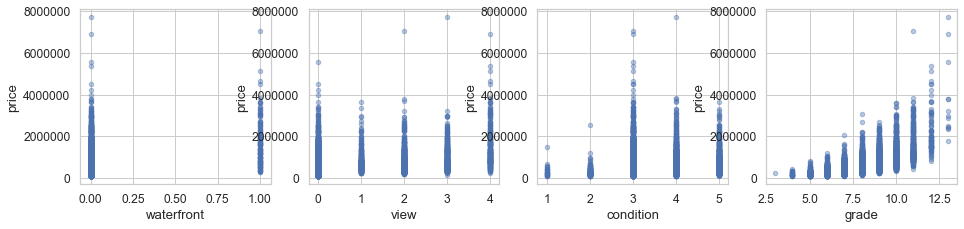

In [309]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['waterfront','view', 'condition', 'grade'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

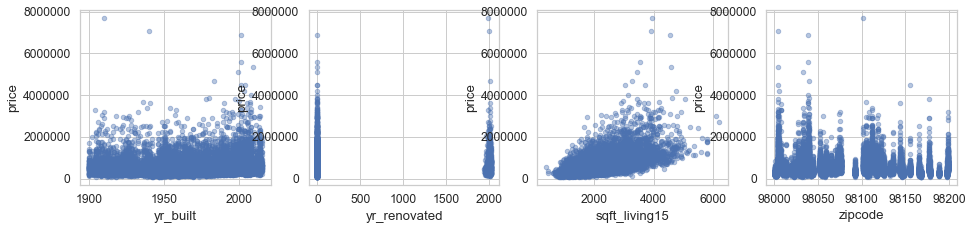

In [310]:
#'yr_built','yr_renovated'
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['yr_built','yr_renovated','sqft_living15','zipcode'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

yr_built and yr_renovated have vertical looking structures instrad of cloud like.<br>
There doesn't seem to be a linear looking relationship between predcitor variables and target.<br>  
It makes sense to structure data into bins so they are treated as categorcial variables.<br>

In [319]:
df_housing_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_categories = df[df_housing_cols]

In [320]:
df_categories.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [321]:
df_categories['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

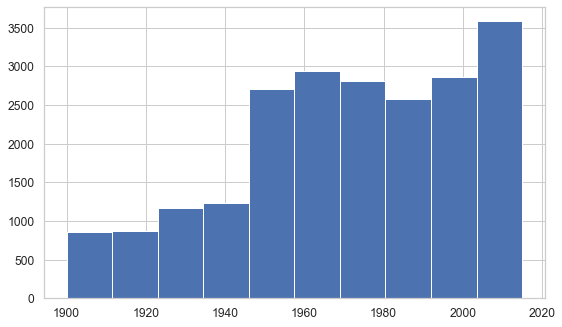

In [322]:
df_categories['yr_built'].hist();

In [323]:
bins=[1890,1950,1974,1996,2016]
bins_yr_built = pd.cut(df_categories['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_ordered()
bins_yr_built.head()

0    (1950, 1974]
1    (1950, 1974]
2    (1890, 1950]
3    (1950, 1974]
4    (1974, 1996]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1890, 1950] < (1950, 1974] < (1974, 1996] < (1996, 2016]]

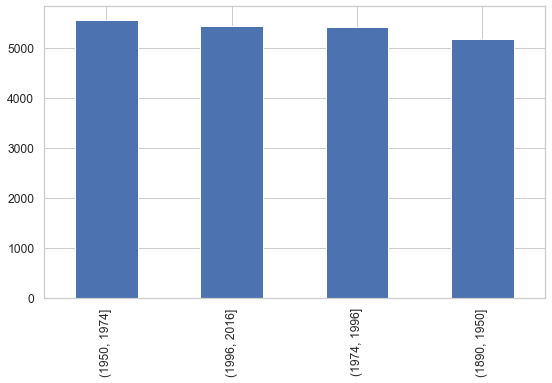

In [324]:
bins_yr_built.value_counts().plot(kind='bar');

In [325]:
df_categories['yr_built']= bins_yr_built
df_categories['yr_built'] = df_categories['yr_built'].cat.codes

In [327]:
df_categories['yr_built'].value_counts()

1    5555
3    5435
2    5423
0    5184
Name: yr_built, dtype: int64

In [329]:
df_categories.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1,1991.0,98125,47.7210,-122.319,1690,7639


In [330]:
df_categories['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [331]:
df_categories['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

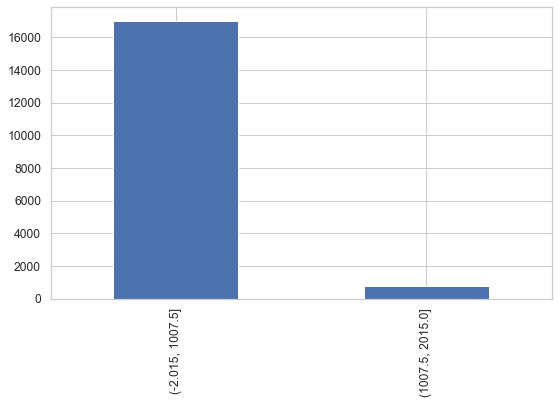

In [332]:
bins_yr_renovated = pd.cut(df_categories['yr_renovated'], 2)
bins_yr_renovated.value_counts().plot(kind='bar');

In [335]:
df_categories['yr_renovated']= bins_yr_renovated
df_categories['yr_renovated'] = abs(df_categories['yr_renovated'].cat.codes)

In [336]:
#0 is didn't renovate
df_categories['yr_renovated']. value_counts()

0    17011
1     4586
Name: yr_renovated, dtype: int64

In [339]:
#yr_built
#yr_renovated
df_housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [340]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

### Collinearity

In [199]:
def multiplot(corr,figsize=(25,10)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True, mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


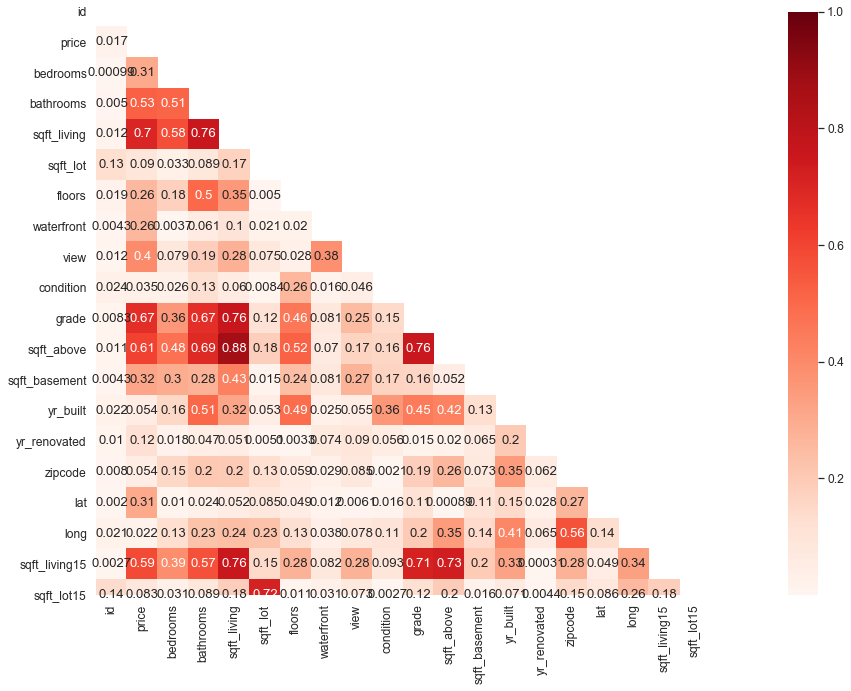

In [341]:
multiplot(np.abs(df_housing.corr()));

In [342]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

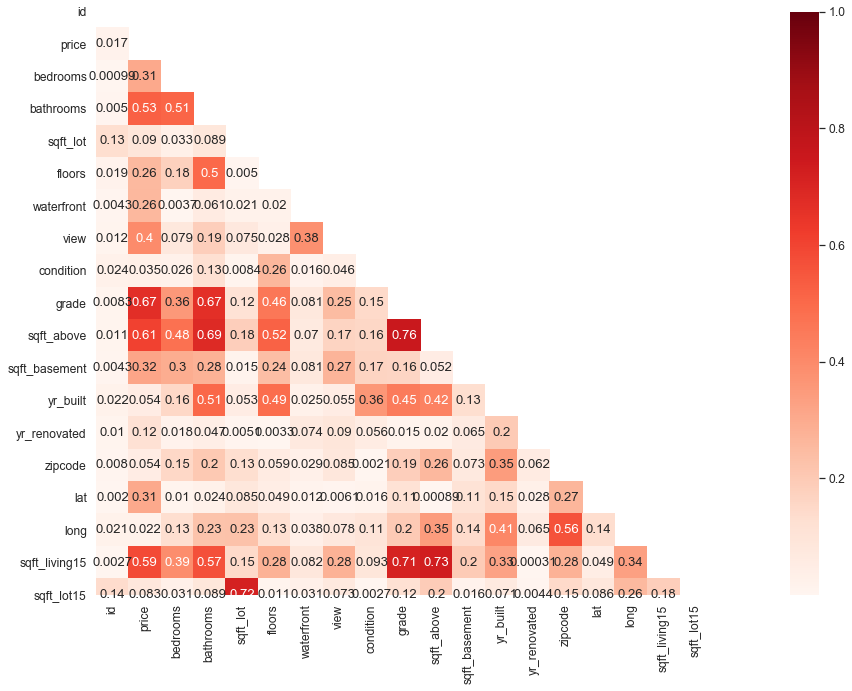

In [346]:
#--only sqft_living was deleted 11/13/19

#sqft_living and bathrooms = bathrooms=0.76 / cut bathrooms didn't
#grade and sqft_living=0.76  / cut grade - didn't
#sqft_above and sqfit_living = 0.88 / cut sqft_living
#sqft_above and grade = 0.76 / sqft_above
colli_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

collin_df = df_housing[colli_cols]
multiplot(np.abs(collin_df.corr()));

### Linearity

In [202]:
#categ_columns = kc_df.copy()

In [347]:
collin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10)
memory usage: 3.5 MB


In [348]:
# yr_built = category
# yr_renovated = category
collin_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

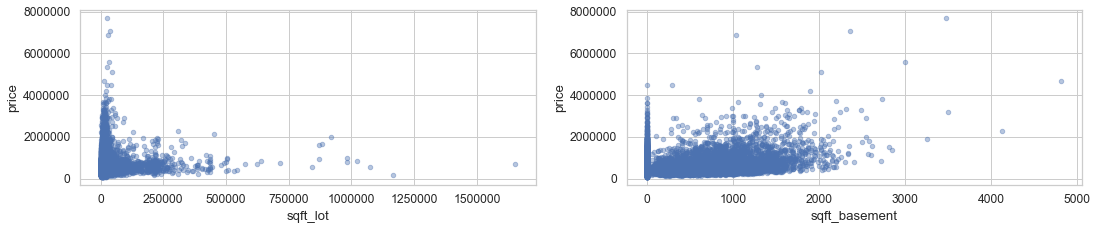

In [349]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_lot','sqft_basement'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

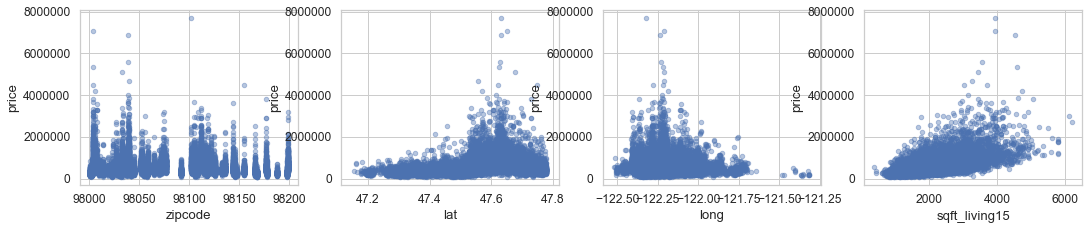

In [350]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['zipcode', 'lat', 'long', 'sqft_living15'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

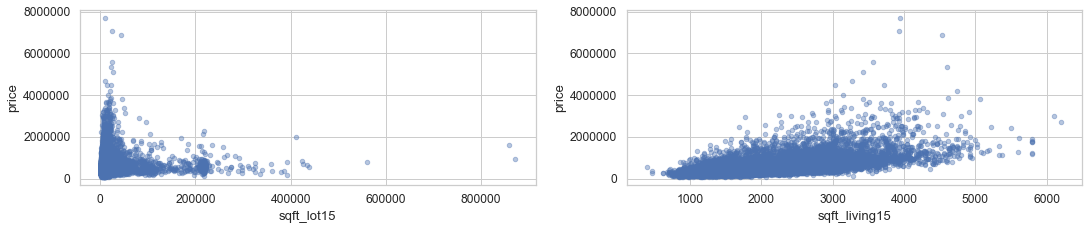

In [351]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15', 'sqft_living15'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

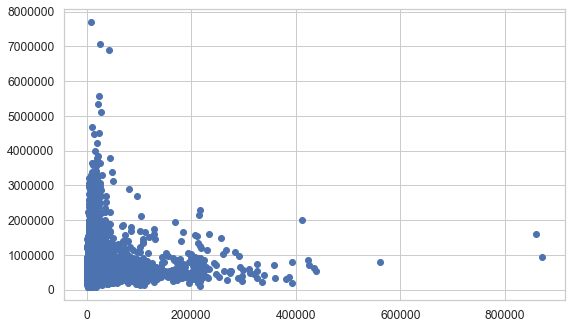

In [352]:
plt.scatter(collin_df['sqft_lot15'], categ_columns['price']);

### Normalization
normalization-process of making data distribution more normally distributed.<br>
og gves you a more normal distribution.<br>
remove outliers, consider Z-score, IQR.<br>

In [354]:
#collin_df.columns
collin_cols = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
df_norm = collin_df[collin_cols]

In [355]:
df_norm.head(2)

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [356]:
df_norm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

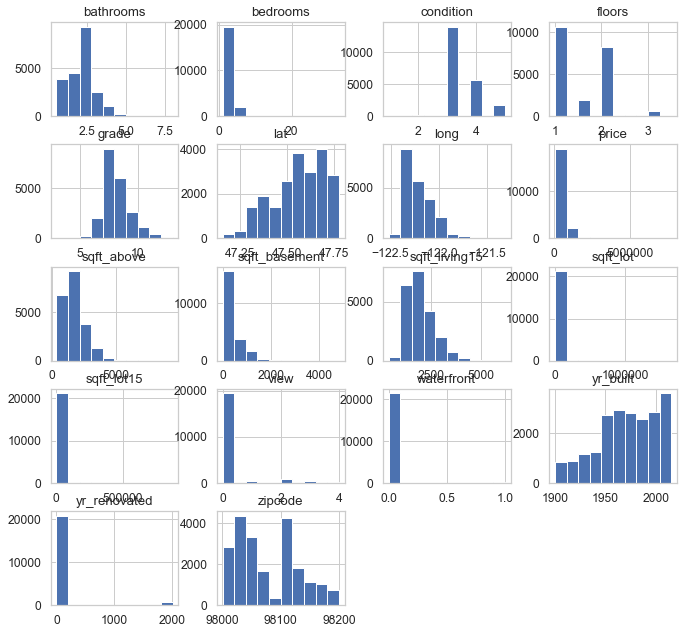

In [358]:
#df_norm.hist(figsize=(13,13));
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_norm.hist(ax = ax);

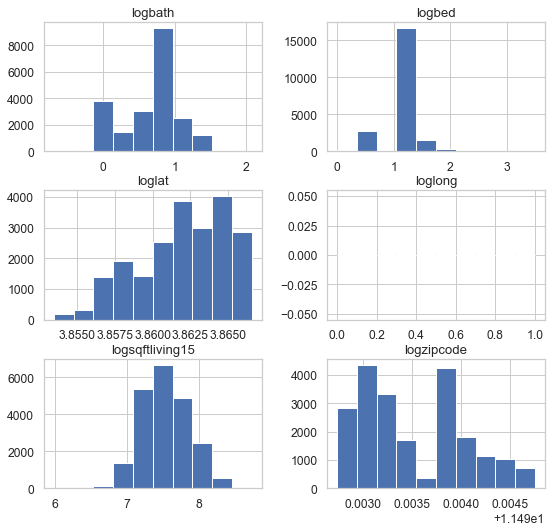

In [361]:
data_log = pd.DataFrame([ ])
data_log['logbath'] = np.log(df_norm['bathrooms'])
data_log['logbed'] = np.log(df_norm['bedrooms'])
data_log['loglat'] = np.log(df_norm['lat'])
data_log['loglong'] = np.log(df_norm['long'])
data_log['logzipcode'] = np.log(df_norm['zipcode'])
#data_log['logsqftliving'] = np.log(df_norm['sqft_living'])
data_log['logsqftliving15'] = np.log(df_norm['sqft_living15'])
#data_log['logsqftbasement'] = np.log(df_norm['sqft_basement'])
data_log.hist(figsize  = [8, 8]);

Normalization

In [362]:
df_norm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

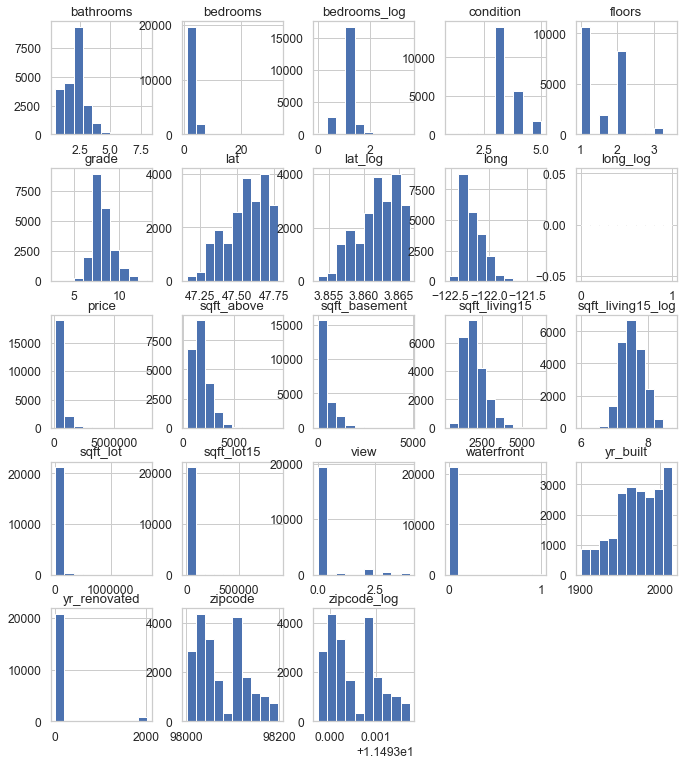

In [363]:
#transforming non-normal features
#let's try to make our data look more normal, and 
#second, let's perform feature scaling to manage the difference in magnitude!
#pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

log_cols =['bedrooms','lat','long','zipcode','sqft_living15']
def normalize_log(df):
    for col in log_cols:
        #housing_df_1[col+'_log'] = np.log(housing_df_1[col])
        df[col+'_log'] = np.log(df[col])
    df.hist(figsize=(10,12));  
normalize_log(df_norm)        

Standardization<br>
not transforming categorical<br>
x' will have mean  𝜇=0  and  𝜎=1<br>

In [364]:
standard_cols = ['sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log']

df_standard = df_norm[standard_cols]

In [365]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_standard)

In [366]:
kc_scaled = pd.DataFrame(data=scaled_data,columns=df_standard.columns)
kc_scaled.describe().round(3)

,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.352,-1.714,-0.649,-2.417,-0.189,-2.918,-2.168,-2.317,-0.444,-2.927
25%,-0.243,-0.723,-0.649,-0.681,-0.189,-0.642,-0.810,-0.724,-0.281,-0.641
50%,-0.181,-0.276,-0.649,0.136,-0.189,0.085,-0.114,-0.214,-0.188,0.086
75%,-0.106,0.509,0.603,0.885,-0.189,0.851,0.632,0.545,-0.098,0.851
max,39.543,9.208,10.322,1.498,5.342,1.570,6.388,6.165,31.497,1.566


In [368]:
df_housing.shape

(21534, 21)

In [ ]:
type(scaled_data), scaled_data.shape

In [ ]:
#all the means are 0 and all standard deviations are 1
#max will show you where outliers are.  If more than 3


In [370]:
#everythin now ecept 'price' has mean of 0.
kc_scaled['price'] = df_housing['price']
kc_scaled['date'] = df_housing['date']
kc_scaled.describe().round(3)

,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log,price
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21472.000
mean,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,539801.045
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,365593.782
min,-0.352,-1.714,-0.649,-2.417,-0.189,-2.918,-2.168,-2.317,-0.444,-2.927,78000.000
25%,-0.243,-0.723,-0.649,-0.681,-0.189,-0.642,-0.810,-0.724,-0.281,-0.641,321020.250
50%,-0.181,-0.276,-0.649,0.136,-0.189,0.085,-0.114,-0.214,-0.188,0.086,450000.000
75%,-0.106,0.509,0.603,0.885,-0.189,0.851,0.632,0.545,-0.098,0.851,645000.000
max,39.543,9.208,10.322,1.498,5.342,1.570,6.388,6.165,31.497,1.566,7700000.000


In [371]:
kc_scaled.head(2)

,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log,price,date
0,-0.228148,-0.735216,-0.64928,-0.544752,-0.189035,-0.353580,-0.305912,-0.943359,-0.260544,-0.352053,221900.0,2014-10-13
1,-0.189675,0.460832,0.26121,-0.680920,5.276149,1.160948,-0.746467,-0.432488,-0.187566,1.159617,538000.0,2014-12-09


In [372]:
df_filter = kc_scaled.copy()
df_filter.columns

Index(['sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log', 'price',
       'date'],
      dtype='object')

In [375]:
filter_cols = ['sqft_lot', 'sqft_above', 'sqft_basement', 'yr_renovated','long', 
               'sqft_living15', 'sqft_lot15']



In [376]:
#np.abs(kc_scaled['sqft_above'])

In [377]:
df_filter = pd.DataFrame()
for col in filter_cols:
    abs_vals = np.abs(kc_scaled[col])>3
    df_filter[col] = np.where(abs_vals==True,np.nan,kc_scaled[col])#[housing_df_2['sqft_lot15']<3]
df_filter.head()

#True == NaN
#df_filter['check_outliers'] = 

,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15
0,-0.228148,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544
1,-0.189675,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566
2,-0.123023,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046
3,-0.243856,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393
4,-0.169423,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556


In [378]:
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [379]:
for col in cat_cols:
    df_filter[col] = df_housing[col].copy()

In [380]:
df_filter.head()

,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,-0.228148,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544,3.0,1.00,1.0,0.0,0.0,3.0,7.0
1,-0.189675,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566,3.0,2.25,2.0,0.0,0.0,3.0,7.0
2,-0.123023,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046,2.0,1.00,1.0,0.0,0.0,3.0,6.0
3,-0.243856,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393,4.0,3.00,1.0,0.0,0.0,5.0,7.0
4,-0.169423,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556,3.0,2.00,1.0,0.0,0.0,3.0,8.0


In [381]:
df_filter['price'] = df_housing['price'].copy()

In [382]:
df_filter.head()

,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
0,-0.228148,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544,3.0,1.00,1.0,0.0,0.0,3.0,7.0,221900.0
1,-0.189675,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566,3.0,2.25,2.0,0.0,0.0,3.0,7.0,538000.0
2,-0.123023,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046,2.0,1.00,1.0,0.0,0.0,3.0,6.0,180000.0
3,-0.243856,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393,4.0,3.00,1.0,0.0,0.0,5.0,7.0,604000.0
4,-0.169423,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556,3.0,2.00,1.0,0.0,0.0,3.0,8.0,510000.0


In [383]:
print(df_filter.shape)
#df_filter.dropna(inplace=True)
print(df_filter.shape)

(21534, 15)
(21534, 15)


In [384]:
try:
    df_filter.dropna(inplace=True)
except:
    print('NaN in the dataframe.')   

In [385]:
df_filter.to_csv('my_df_filter.csv')

In [386]:
df_filter.describe().round(3)

,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
count,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000,19562.000
mean,-0.123,-0.083,-0.048,-0.189,-0.062,-0.073,-0.131,3.371,2.115,1.494,0.007,0.235,3.410,7.657,539335.864
std,0.280,0.881,0.906,0.000,0.913,0.902,0.331,0.929,0.768,0.540,0.082,0.768,0.651,1.170,362086.812
min,-0.352,-1.714,-0.649,-0.189,-2.118,-2.228,-0.444,1.000,0.500,1.000,0.000,0.000,1.000,3.000,78000.000
25%,-0.244,-0.735,-0.649,-0.189,-0.832,-0.754,-0.284,3.000,1.750,1.000,0.000,0.000,3.000,7.000,323000.000
50%,-0.185,-0.324,-0.649,-0.189,-0.185,-0.257,-0.193,3.000,2.250,1.500,0.000,0.000,3.000,7.000,450000.000
75%,-0.123,0.413,0.512,-0.189,0.554,0.458,-0.113,4.000,2.500,2.000,0.000,0.000,4.000,8.000,645000.000
max,2.951,2.998,2.993,-0.189,2.963,2.998,2.975,33.000,8.000,3.500,1.000,4.000,5.000,13.000,7700000.000


In [387]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [388]:
cols = df_filter.drop(['price'],axis=1).columns
str_cols = ' + '.join(cols)
str_cols

'sqft_lot + sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [389]:
formula = 'price~'+str_cols
formula

'price~sqft_lot + sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [390]:
model = smf.ols(formula=formula, data=df_filter).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1807.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:05:37   Log-Likelihood:            -2.7042e+05
No. Observations:               19562   AIC:                         5.409e+05
Df Residuals:                   19548   BIC:                         5.410e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.096e+06   1.66e+04    -66.148      0.000   -1.13e+06   -1.06e+06
sqft_lot       6640.3837   1.07e+04      0.619      0.536   -1.44e+04    2.77e+04
sqft_above     -375.8492   3096.691     -0.121      0.903   -6445.628    5693.929
sqft_basement  1822.2334   2123.292      0.858      0.391   -2339.600    5984.067
yr_renovated   2.071e+05   3131.091     66.148      0.000    2.01e+05    2.13e+05
long          -1682.5499   2188.046     -0.769      0.442   -5971.307    2606.207
sqft_living15   531.6124   3099.521      0.172      0.864   -5543.713    6606.938
sqft_lot15    -1692.7350   9179.278     -0.184      0.854   -1.97e+04    1.63e+04
bedrooms       1.358e+04   2211.010      6.141      0.000    9244.752    1.79e+04
bathrooms      6.397e+04   3492.244     18.317      0.000    5.71e+04    7.08e+04
floors        -3.192e+04   3943.843     -8.094      0.000   -3.97e+04   -2.42e+04
waterfront     5.965e+05    2.3e+04     25.947      0.000    5.51e+05    6.42e+05
view           8.099e+04   2550.281     31.756      0.000     7.6e+04     8.6e+04
condition      6.106e+04   2799.302     21.813      0.000    5.56e+04    6.65e+04
grade          1.711e+05   2077.826     82.347      0.000    1.67e+05    1.75e+05
==============================================================================
Omnibus:                    16179.360   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1447554.754
Skew:                           3.443   Prob(JB):                         0.00
Kurtosis:                      44.576   Cond. No.                     1.86e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.14e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### QQ-plot

### Explore House Values by Age

In [ ]:
house_age = housing_df.copy()
house_age['year'] = house_age['date'].dt.year

In [ ]:
house_age['age'] = house_age['year']-house_age['yr_built'] 
house_age.loc[house_age['age']< 11]

### Factors that Impact the Price of a House

In [ ]:
#Explore Home values by age
house_age['decades'] = abs(house_age['age'] // 10)
to_plot = house_age.groupby('decades').price.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Median Value of Homes')
plt.title('Average Home Values by Home Age');

How does the number of bedrooms in homes have an impact on the price of a home?  What kind of relationship is there between home prices and number of bedrooms.  A statistical analysis shows that the average number
of bedrooms in the dataset is 3.37 bedrooms.  However, when we check this relationship the average number of bedrooms 
does not mean the highest price for a home neither does the highest nubmer og bedrooms.  Based on the scatter plot below it shows that homes with 5 bedrooms consituteded the highest price values.  Still basic logic would tend to show that higher the number of bedrooms the higher hte price of the home.  It actually shows the opposite, in this dataset, after 5 bedrooms it shows that the price of the homes started to decrease. pretty drastcially.  For example, it showed the homes with 6 bedrooms the median price was in the range below $200,000.<br>
Of course my analysis is made on broad assertions working with just these 2 columns.  I have not account for any data which would have an impact with things such as hte overall condition of the home, ie, perhaps home with more bedrooms have not been renovated or maintained properly over the years.<br>

In [ ]:
housing_df['bedrooms'].describe()

In [ ]:
plt.scatter(housing_df['bedrooms'], housing_df['price']);

In [ ]:
house_age['year']

In [ ]:
pivot = house_age.pivot_table(index='year', values='price', aggfunc=np.median)
pivot

Homes prices based on zipcode. The zip code with the highest home value is 98039.  The zipcide with the lowest home prices is 98002.<br>

In [ ]:
plt.figure(figsize=(14,6));
house_age['price'].groupby(house_age['zipcode']).median().sort_values().plot(kind='bar')